In [1]:
import pandas as pd
import seaborn as sns

In [149]:
countries = pd.read_csv("Proyecto/countries.csv")

In [150]:
paises = pd.DataFrame(countries.loc[:, ["continent",
                       "location",
                       "date",
                       'total_cases_per_million', 
                       "total_deaths_per_million"]])

In [151]:
# Cleanup
pais = paises.dropna(subset=["total_deaths_per_million"])

In [152]:
pais.head()

,continent,location,date,total_cases_per_million,total_deaths_per_million
28,Asia,Afghanistan,23/03/2020,1.004,0.025
29,Asia,Afghanistan,24/03/2020,1.054,0.025
30,Asia,Afghanistan,25/03/2020,1.858,0.025
31,Asia,Afghanistan,26/03/2020,2.008,0.050
32,Asia,Afghanistan,27/03/2020,2.284,0.050


In [153]:
pais

,continent,location,date,total_cases_per_million,total_deaths_per_million
28,Asia,Afghanistan,23/03/2020,1.004,0.025
29,Asia,Afghanistan,24/03/2020,1.054,0.025
30,Asia,Afghanistan,25/03/2020,1.858,0.025
31,Asia,Afghanistan,26/03/2020,2.008,0.050
32,Asia,Afghanistan,27/03/2020,2.284,0.050
...,...,...,...,...,...
138936,Africa,Zimbabwe,05/12/2021,9213.121,312.082
138937,Africa,Zimbabwe,06/12/2021,9213.121,312.082
138938,Africa,Zimbabwe,07/12/2021,9382.414,312.281
138939,Africa,Zimbabwe,08/12/2021,9980.539,312.745


In [155]:
from datetime import date, datetime, timedelta as td
pais["date"]  = pd.to_datetime(pais["date"], format="%d/%m/%Y")
pais.dtypes

C:\Users\Frida\AppData\Local\Temp\ipykernel_17172\1285466713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pais["date"]  = pd.to_datetime(pais["date"], format="%d/%m/%Y")


continent                           object
location                            object
date                        datetime64[ns]
total_cases_per_million            float64
total_deaths_per_million           float64
dtype: object

In [156]:
grupo1 = pais[pais['date'].dt.year == 2020].groupby(pais["location"]).last()
grupo1

,continent,location,date,total_cases_per_million,total_deaths_per_million
location,,,,,
Afghanistan,Asia,Afghanistan,2020-12-31,1313.655,54.951
Africa,None,Africa,2020-12-31,2009.812,47.666
Albania,Europe,Albania,2020-12-31,20298.413,411.078
Algeria,Africa,Algeria,2020-12-31,2232.576,61.771
Andorra,Europe,Andorra,2020-12-31,104054.089,1085.917
...,...,...,...,...,...
Vietnam,Asia,Vietnam,2020-12-31,14.923,0.357
World,None,World,2020-12-31,10632.460,238.816
Yemen,Asia,Yemen,2020-12-31,68.841,20.006


In [157]:
grupo2 = pais[pais['date'].dt.year == 2021].groupby(pais["location"]).last()
grupo2

,continent,location,date,total_cases_per_million,total_deaths_per_million
location,,,,,
Afghanistan,Asia,Afghanistan,2021-12-09,3955.901,183.781
Africa,None,Africa,2021-12-09,6433.303,163.112
Albania,Europe,Albania,2021-12-09,70611.786,1088.782
Algeria,Africa,Algeria,2021-12-09,4756.612,137.303
Andorra,Europe,Andorra,2021-12-09,249140.316,1719.368
...,...,...,...,...,...
Vietnam,Asia,Vietnam,2021-12-09,13929.401,276.931
World,None,World,2021-12-09,34102.785,671.483
Yemen,Asia,Yemen,2021-12-09,329.511,64.184


C:\Users\Frida\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Frida\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cases_per_million', ylabel='Density'>

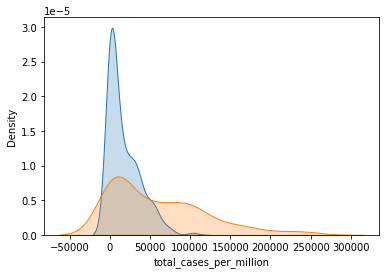

In [158]:
sns.distplot(grupo1["total_cases_per_million"], hist=False, kde_kws = {'shade': True})
sns.distplot(grupo2["total_cases_per_million"], hist=False, kde_kws = {'shade': True})

C:\Users\Frida\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Frida\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_deaths_per_million', ylabel='Density'>

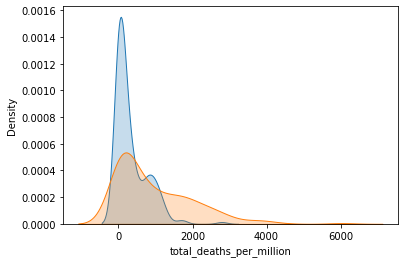

In [159]:
sns.distplot(grupo1["total_deaths_per_million"], hist=False, kde_kws = {'shade': True})
sns.distplot(grupo2["total_deaths_per_million"], hist=False, kde_kws = {'shade': True})